<a href="https://colab.research.google.com/github/marsyaaurel08/CRUD_dasarWeb/blob/main/JS11_KLASIFIKASI_2_MARSYA_AURELIA_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM 1

**Import Library**

In [83]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

**Membuat Data Dummy**

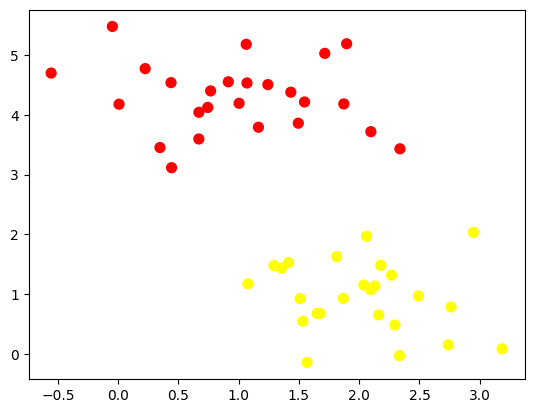

In [84]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

**Ilustrasi Margin**

(-1.0, 3.5)

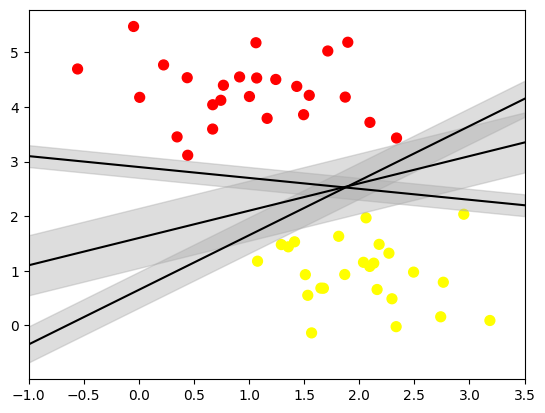

In [85]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

**Fitting Model**

In [86]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

**Fungsi untuk membantu visualisasi hasil fit model**

In [87]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

**Plotting dengan fungsi yang telah dibuat**

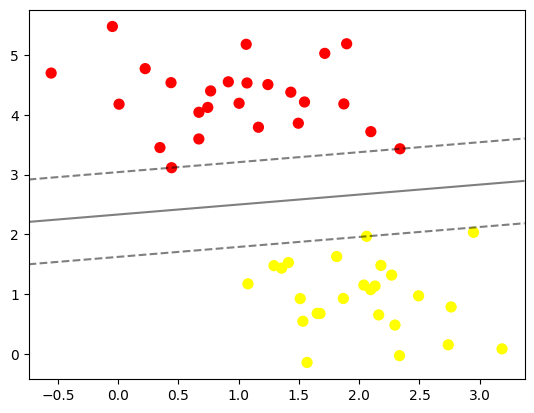

In [88]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

**Perbandingan**

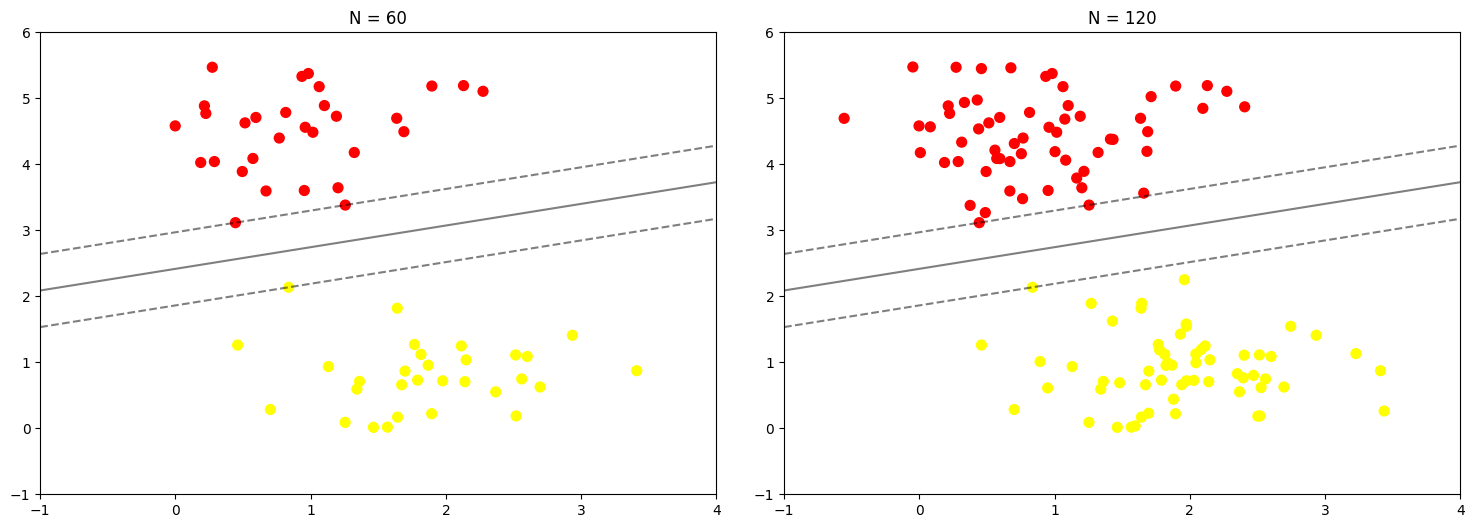

In [89]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

**Ilustrasi perubahan jumlah data**

In [90]:
# jumlah data dapat dipilih di antara 10 atau 200 buah data, telihat tidak ada perubahan pada model

from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

# PRAKTIKUM 2

**Import Library**

In [91]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

**Membuat kembali fungsi plotting**

In [92]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

**Membuat data dummy non linier**

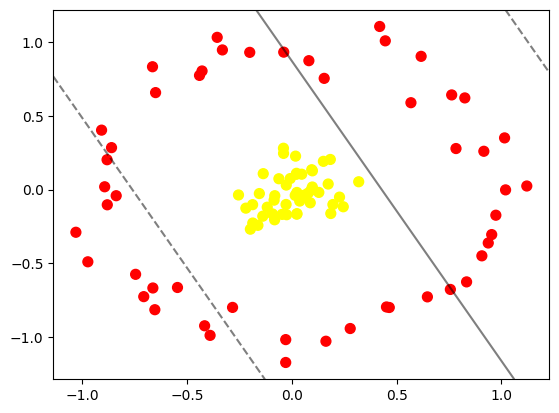

In [93]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

**Plot visualisasi diubah menjadi model 3D**

In [94]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azim=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.44542732,  1.00967069],
       [-1.03127226, -0.28944566],
       [-0.83894389, -0.04137599],
       [-0.02547904, -0.1704255 ],
       [-0.04720911, -0.1681149 ],
       [ 0.15006058,  0.19189637],
       [ 1.12087592,  0.02451878],
       [-0.02814758, -0.10087676],
       [-0.44123631,  0.7750863 ],
       [ 0.09435811,  0.13496928],
       [ 0.19539925, -0.10120279],
       [ 0.04650959,  0.10452183],
       [-0.66558153,  0.83387447],
       [ 0.09721949,  0.01764468],
       [ 0.04310116, -0.05588673],
       [ 0.24487564, -0.11644404],
       [-0.3320315 ,  0.94800889],
       [ 0.82502663,  0.62233252],
       [-0.02975544, -1.01799711],
       [-0.41683825, -0.92416715],
       [ 0.08729929, -0.08951512],
       [ 0.90642933, -0.44946893],
       [ 0.01552377, -0.03900537],
       [-0.00822275,  0.07499571],
       [ 0.03697765, -0.07770725],
       [-0.97424418, -0.48994879],
       [-0.28352533, -0.79946234],
       [-0.03924509,  0.93297547],
       [ 0.46448511, -0.79998327],
       [ 0.97313117, -0.17375589],
       [-0.11800289, -0.11933014],
       [ 0.18541286, -0.16215316],
       [ 0.17282503,  0.03791268],
       [ 0.02073569,  0.10384069],
       [ 0.95336835, -0.30527232],
       [-0.90870804,  0.40363962],
       [-0.0819492 , -0.04133758],
       [ 0.16215321, -1.02903911],
       [-0.88144454, -0.10303159],
       [-0.16250701, -0.24243595],
       [-0.06241551,  0.07374569],
       [-0.2551716 , -0.03633013],
       [ 0.56784244,  0.5898476 ],
       [ 0.45117836, -0.79641716],
       [ 0.15386841,  0.75508195],
       [ 0.27802967, -0.94278584],
       [-0.02984211, -1.17323623],
       [-0.04016372,  0.24579305],
       [ 0.41872344,  1.10717771],
       [ 0.03198729, -0.03643486],
       [-0.0272392 ,  0.03090895],
       [-0.65092354,  0.65838041],
       [ 0.12820514, -0.01899782],
       [-0.15565302, -0.0267739 ],
       [ 0.0606962 , -0.03683512],
       [-0.42913357,  0.80517176],
       [ 0.07717019, -0.02408061],
       [ 1.01956034, -0.00177979],
       [ 0.18303982,  0.2046667 ],
       [-0.09325746, -0.1648885 ],
       [ 0.83347608, -0.62626455],
       [-0.35688536,  1.03343301],
       [ 1.01480638,  0.35099295],
       [ 0.61649045,  0.90448016],
       [-0.08529601, -0.07155508],
       [ 0.91585545,  0.2602037 ],
       [-0.65441616, -0.81507644],
       [-0.39081144, -0.9892437 ],
       [ 0.02290385, -0.16683882],
       [ 0.02347929, -0.0194    ],
       [-0.13933924, -0.1804477 ],
       [ 0.75604943, -0.67754035],
       [ 0.08070425,  0.87505654],
       [-0.04062022,  0.28077927],
       [ 0.01721558,  0.22719645],
       [ 0.93687473, -0.36226501],
       [ 0.64639565, -0.72799379],
       [ 0.05710745, -0.04641913],
       [-0.13712628,  0.10821756],
       [-0.8611916 ,  0.28493657],
       [ 0.31857162,  0.05328198],
       [ 0.22699522, -0.05093032],
       [-0.70739265, -0.72639756],
       [-0.54637222, -0.6642646 ],
       [-0.66385776, -0.66765287],
       [-0.19852419, -0.26863118],
       [-0.88246212,  0.20277727],
       [-0.08281594, -0.20481984],
       [-0.18709598, -0.226793  ],
       [-0.22002028, -0.12584457],
       [-0.20153006,  0.93154011],
       [ 0.09755437,  0.12742806],
       [-0.89389774,  0.01920632],
       [-0.18783597, -0.10218118],
       [ 0.09110266, -0.00438914],
       [-0.74628014, -0.57499509],
       [ 0.76235344,  0.6426273 ],
       [ 0.0240123 , -0.16329436],
       [ 0.02172459,  0.11057437],
       [ 0.78290277,  0.27875934]]), y=array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0]))>

**Fitting Model**

In [95]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

**Plot hasil decision boundaries dari kernel RBF**

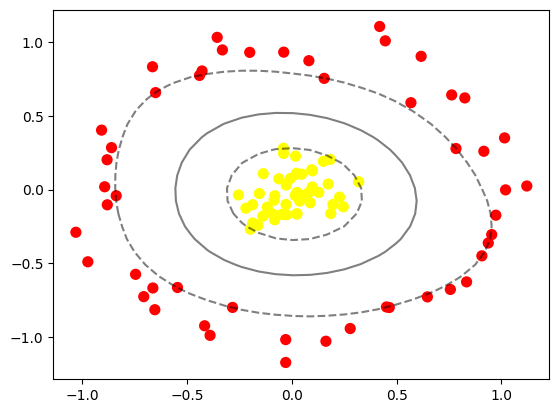

In [96]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

# PRAKTIKUM 3

**Import Library dan Buat Fungsi Plotting**

In [97]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

**Buat fungsi untuk menampilkan fitting data**

In [98]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

**Buat Data Dummy**

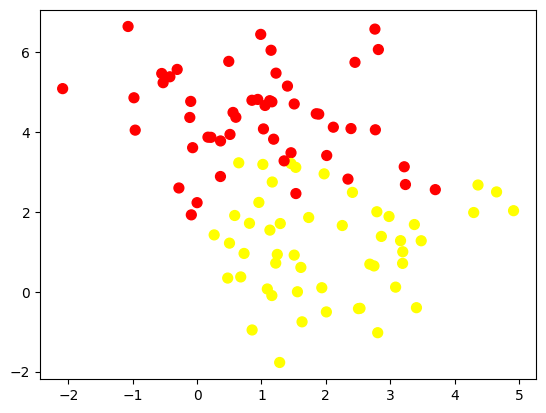

In [99]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

**Analisis Dampak Tunning**

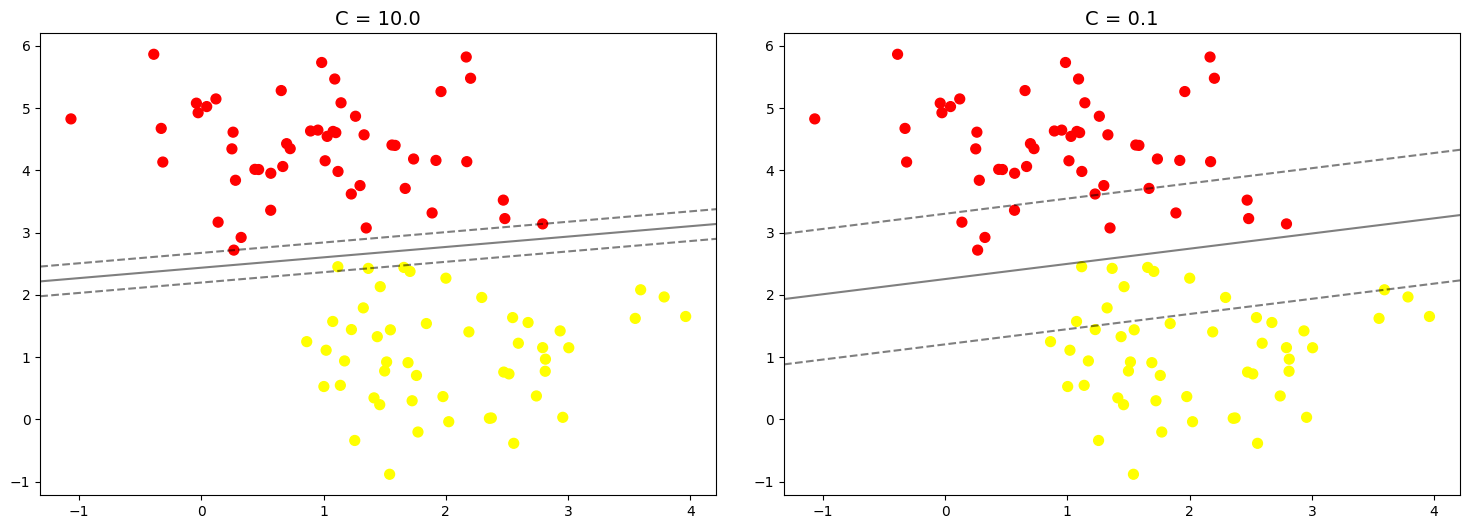

In [100]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# PRAKTIKUM 4

**Unduh Dataset**

In [101]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


**Inspeksi Citra Wajah**

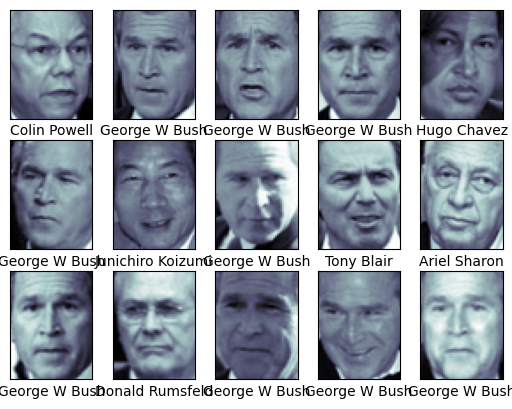

In [102]:
# contoh wajah yang digunakan
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

**Pra Pengolahan Data**

In [103]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

# Pipeline digunakan untuk melakukan proses secara bertahap dalam
# 1 eksekusi fungsi secara langsung
model = make_pipeline(pca, svc)

**Split Data**

In [104]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

**Pembuatan Model + Tunning**

In [105]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 58s, sys: 34.1 ms, total: 1min 58s
Wall time: 1min 12s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


**Menggunakan model terbaik tsb untuk proses prediksi**

In [106]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

**Cek Hasil Prediksi**

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

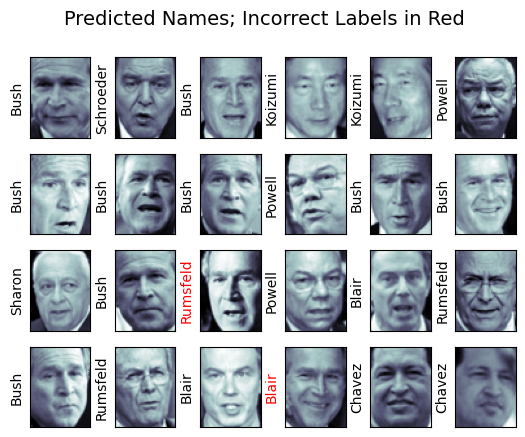

In [107]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

**Cek Performansi**

In [108]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



**Menggunakan confusion matrix untuk mengetahui label yang terklasifikasi dengan benar dan tidak**

Text(113.92222222222219, 0.5, 'predicted label')

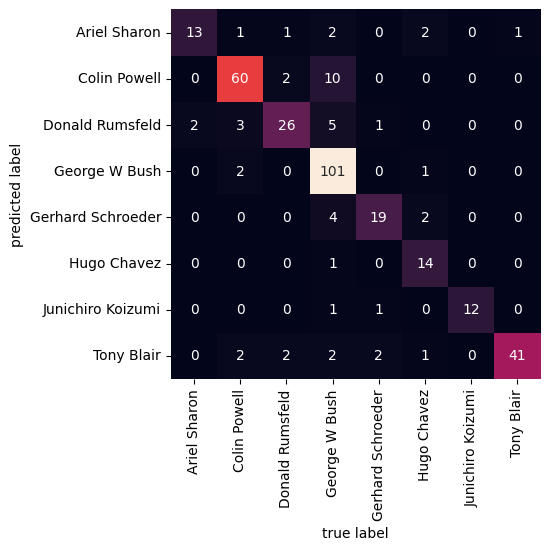

In [109]:
# bentuk confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# PRAKTIKUM 5

**Import Library**

In [110]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [111]:
from google.colab import files
uploaded = files.upload()

Saving images.zip to images (2).zip


In [112]:
import zipfile

with zipfile.ZipFile("images.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

In [113]:
# Image directories
train_dir = "images/training/"
test_dir = "images/test/"

**Load data dan Visualisasikan**

In [114]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

**Load gambar training**

In [115]:
# Load training data
train_img = load_dataset(train_dir)

**Melakukan pengecekan pada salah satu data**

In [116]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[241, 246, 249],
         [201, 206, 209],
         [204, 209, 212],
         ...,
         [179, 185, 185],
         [179, 185, 185],
         [179, 185, 185]],
 
        [[241, 246, 249],
         [201, 206, 209],
         [204, 209, 212],
         ...,
         [179, 185, 185],
         [179, 185, 185],
         [179, 185, 185]],
 
        [[241, 246, 249],
         [201, 206, 209],
         [204, 209, 212],
         ...,
         [179, 185, 185],
         [179, 185, 185],
         [179, 185, 185]],
 
        ...,
 
        [[ 30,  27,  10],
         [ 25,  24,   6],
         [ 24,  21,   4],
         ...,
         [ 23,  24,   8],
         [ 23,  24,   8],
         [ 24,  25,   9]],
 
        [[ 24,  22,   7],
         [ 21,  19,   4],
         [ 20,  18,   3],
         ...,
         [ 23,  24,   8],
         [ 23,  24,   8],
         [ 23,  24,   8]],
 
        [[ 17,  18,   4],
         [ 15,  16,   2],
         [ 15,  16,   2],
         ...,
         [ 23,  24,  10],
  

**Cek ukuran gambar secara acak**

In [117]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 55
(471, 640, 3)


**Membuat fungsi untuk membantu memvisualkan gambar**

In [118]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

**Visulisasi gambar secara acak**

Shape	: (458, 800, 3)
Label	: night


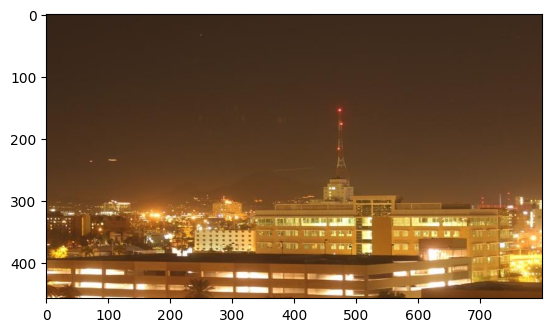

In [119]:
random_img_viz(train_img)

**Pra Pengolahan Data**

In [120]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

**Membuat fungsi untuk encoding label**

In [121]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

**Membuat fungsi untuk melakukan kedua hal tsb secara sekaligus untuk semua gambar dalam list**

In [122]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

**Pra pengolahan data pada data training**

In [123]:
train_std_img_list = preprocess(train_img)

**Pengecekan ukuran gambar secara acak**

In [124]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 52
(600, 1100, 3)


**Inspeksi visual dengan fungsi random_img_viz**

Shape	: (600, 1100, 3)
Label	: 0


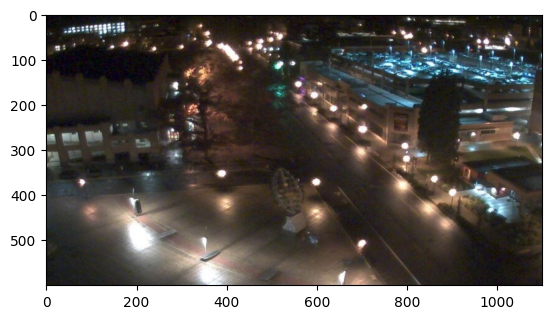

In [125]:
random_img_viz(train_std_img_list)

**Ekstraksi Fitur**

**Membuat fungsi untuk mendapatkan nilai rata-rata tingkat kecerahan**

In [126]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

In [127]:
print(avg_brightness(train_std_img_list[0][0]))

157.02129696969698


**Melakukan pengecekan pada gambar**

Image 43
Avg Brighness: 108.4199


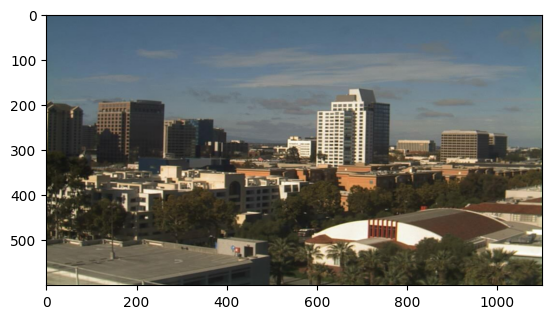

In [128]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

**Klasifikasi dengan metode threshold**

In [129]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

**Klasifikasi dengan metode threshold**

In [130]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Image 238
Actual label: 0
Predicted label: 0


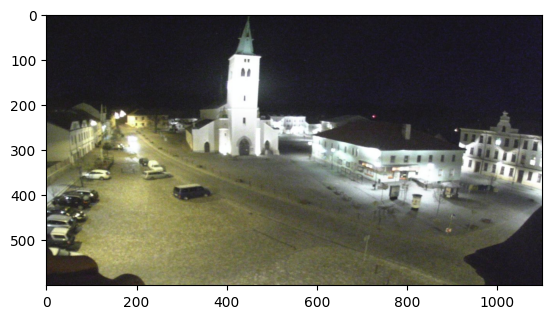

In [131]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

**Evaluasi Manual**

In [132]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

**Evaluasi data training dengan nilai ambang batas 120**

In [133]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


**Evaluasi pada data testing**

In [134]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


**Klasifikasi SVM => Membuat Feature Vectors**

In [135]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

**cek hasil pada data training**

In [136]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,157.021297,1.0
1,158.018809,1.0
2,137.345858,1.0
3,143.662879,1.0
4,110.086635,1.0


In [137]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,129.938794,1.0
1,154.042817,1.0
2,105.001747,1.0
3,157.660683,1.0
4,98.868853,1.0


**Membuat model SVM**

In [138]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

**Evaluasi**

In [139]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


# TUGAS PRAKTIKUM

**1. Buatlah model SVM dengan menggunakan data voice.csv dengan ketentuan,**

**Split data dengan rasio 70:30 dan 80:20 untuk setiap model yang akan dibangun.**

**Gunakan model dengan kernel linier.**

**Gunakan model dengan kernel polynomial.**

**Gunakan model dengan kernel RBF.**

**Tabulasikan performansi setiap split dan kernel berdasarkan metrik akurasi.**

**Import Library**

In [140]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tabulate import tabulate

**Muat Dataset**


In [141]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning   15/Data/voice.csv')

**Pra-pemrosesan Data**

In [142]:
# Encoding Kolom Target ('label')
# Ubah 'male' menjadi 1 dan 'female' menjadi 0
df['label'] = df['label'].map({'male': 1, 'female': 0})

# Pemisahan Fitur (X) dan Target (y)
X = df.drop('label', axis=1)
y = df['label']

# Scaling Fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nShape data (X, y):", X_scaled.shape, y.shape)


Shape data (X, y): (3168, 20) (3168,)


**Membuat Fungsi yang menerima data, rasio, split, dan jenis kernel, kemudian megembalikan nilai akurasi**

In [143]:
def train_and_evaluate_svm(X, y, test_size_ratio, kernel_type):
    """
    Melatih model SVM dengan kernel tertentu dan rasio split,
    kemudian mengembalikan akurasi pada data uji (test).
    """
    # Menghitung test_size dari rasio (misalnya 0.3 untuk 70:30)
    test_size = test_size_ratio / 100.0

    # Split Data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )

    # Inisialisasi dan Latih Model SVM
    if kernel_type == 'linear':
        model = SVC(kernel='linear', random_state=42)
    elif kernel_type == 'poly':
        # Untuk polynomial, biasanya menggunakan degree=3
        model = SVC(kernel='poly', degree=3, random_state=42)
    elif kernel_type == 'rbf':
        # RBF (Radial Basis Function) adalah kernel default
        model = SVC(kernel='rbf', random_state=42)
    else:
        raise ValueError("Kernel tidak valid.")

    model.fit(X_train, y_train)

    # Prediksi dan Evaluasi
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

**Eksperimen dan pengumpulan hasil**

In [144]:
# Daftar konfigurasi yang akan diuji
configurations = [
    {'split_ratio': '70:30', 'test_size': 30, 'kernel': 'linear'},
    {'split_ratio': '70:30', 'test_size': 30, 'kernel': 'poly'},
    {'split_ratio': '70:30', 'test_size': 30, 'kernel': 'rbf'},
    {'split_ratio': '80:20', 'test_size': 20, 'kernel': 'linear'},
    {'split_ratio': '80:20', 'test_size': 20, 'kernel': 'poly'},
    {'split_ratio': '80:20', 'test_size': 20, 'kernel': 'rbf'},
]

results = []

print("\nMemulai Pelatihan dan Evaluasi Model...")
for config in configurations:
    ratio = config['split_ratio']
    size = config['test_size']
    kernel = config['kernel']

    # Pelatihan dan Evaluasi
    accuracy = train_and_evaluate_svm(X_scaled, y, size, kernel)

    # Simpan Hasil
    results.append([ratio, kernel, f"{accuracy:.4f}"])
    print(f"-> Selesai: Split {ratio}, Kernel {kernel}, Akurasi: {accuracy:.4f}")


Memulai Pelatihan dan Evaluasi Model...
-> Selesai: Split 70:30, Kernel linear, Akurasi: 0.9790
-> Selesai: Split 70:30, Kernel poly, Akurasi: 0.9590
-> Selesai: Split 70:30, Kernel rbf, Akurasi: 0.9832
-> Selesai: Split 80:20, Kernel linear, Akurasi: 0.9748
-> Selesai: Split 80:20, Kernel poly, Akurasi: 0.9574
-> Selesai: Split 80:20, Kernel rbf, Akurasi: 0.9826


**Tabulasi Performansi**

In [145]:
# Header untuk Tabel
headers = ["Split Data", "Kernel SVM", "Akurasi (Test Set)"]

# Cetak Tabel menggunakan tabulate
print("HASIL PERBANDINGAN PERFORMASI MODEL SVM")
print(tabulate(results, headers=headers, tablefmt="fancy_grid"))

# Contoh interpretasi
best_model = max(results, key=lambda item: float(item[2]))
print(f"\nModel Terbaik berdasarkan Akurasi: Split {best_model[0]} dengan Kernel {best_model[1]} (Akurasi: {best_model[2]})")

HASIL PERBANDINGAN PERFORMASI MODEL SVM
╒══════════════╤══════════════╤══════════════════════╕
│ Split Data   │ Kernel SVM   │   Akurasi (Test Set) │
╞══════════════╪══════════════╪══════════════════════╡
│ 70:30        │ linear       │               0.979  │
├──────────────┼──────────────┼──────────────────────┤
│ 70:30        │ poly         │               0.959  │
├──────────────┼──────────────┼──────────────────────┤
│ 70:30        │ rbf          │               0.9832 │
├──────────────┼──────────────┼──────────────────────┤
│ 80:20        │ linear       │               0.9748 │
├──────────────┼──────────────┼──────────────────────┤
│ 80:20        │ poly         │               0.9574 │
├──────────────┼──────────────┼──────────────────────┤
│ 80:20        │ rbf          │               0.9826 │
╘══════════════╧══════════════╧══════════════════════╛

Model Terbaik berdasarkan Akurasi: Split 70:30 dengan Kernel rbf (Akurasi: 0.9832)


**2. Gunakan data pada praktikum 5 untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histrogram. Gunakan rasio 80:20. Anda dapat bereksperimen dengan hyperparameter tunning dari kernel RBF. Catat performansi akurasinya!**

In [146]:
# Image directories
train_dir = "images/training/"
test_dir = "images/test/"

In [147]:
train_img = load_dataset(train_dir)
train_std_img_list = preprocess(train_img)

test_img = load_dataset(test_dir)
test_std_img_list = preprocess(test_img)

print(f"Number of preprocessed training images: {len(train_std_img_list)}")
print(f"Number of preprocessed test images: {len(test_std_img_list)}")

Number of preprocessed training images: 240
Number of preprocessed test images: 160


**Extract Histogram Features**


In [148]:
def extract_histogram_features(image):
    # Convert image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Define histogram parameters
    # H: 0-180, S: 0-255, V: 0-255
    hist_bins = 32
    hist_range_h = [0, 180]
    hist_range_sv = [0, 256]

    # Compute histogram for Hue channel
    hist_h = cv2.calcHist([hsv_image], [0], None, [hist_bins], hist_range_h)
    # Compute histogram for Saturation channel
    hist_s = cv2.calcHist([hsv_image], [1], None, [hist_bins], hist_range_sv)
    # Compute histogram for Value channel
    hist_v = cv2.calcHist([hsv_image], [2], None, [hist_bins], hist_range_sv)

    # Normalize histograms
    cv2.normalize(hist_h, hist_h, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
    cv2.normalize(hist_s, hist_s, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
    cv2.normalize(hist_v, hist_v, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

    # Concatenate normalized histograms into a single feature vector
    feature_vector = np.concatenate((hist_h.flatten(), hist_s.flatten(), hist_v.flatten()))

    return feature_vector

# Apply the function to training data
train_features = []
train_labels = []
for img, label in train_std_img_list:
    features = extract_histogram_features(img)
    train_features.append(features)
    train_labels.append(label)

train_features = np.array(train_features)
train_labels = np.array(train_labels)

# Apply the function to test data
test_features = []
test_labels = []
for img, label in test_std_img_list:
    features = extract_histogram_features(img)
    test_features.append(features)
    test_labels.append(label)

test_features = np.array(test_features)
test_labels = np.array(test_labels)

print(f"Shape of training features: {train_features.shape}")
print(f"Shape of training labels: {train_labels.shape}")
print(f"Shape of test features: {test_features.shape}")
print(f"Shape of test labels: {test_labels.shape}")


Shape of training features: (240, 96)
Shape of training labels: (240,)
Shape of test features: (160, 96)
Shape of test labels: (160,)


**Train model SVM dengan RBF kernel menggunakan rasio 80:20**



In [149]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split training data into 80:20 for internal validation during GridSearchCV
# (GridSearchCV will handle the splits internally, but we use X_train_tuned/y_train_tuned for fitting the GridSearchCV object)
# For the overall split, we already have train_features and test_features based on the original 80:20 ratio from the problem statement
# So, the problem implies using the preprocessed train_features as the training set for the model, and test_features as the test set.

X_train_svm, X_val_svm, y_train_svm, y_val_svm = train_test_split(train_features, train_labels, test_size=0.2, random_state=42, stratify=train_labels)

# Define the parameter grid for RBF kernel
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1]
}

# Initialize GridSearchCV with SVC (RBF kernel is default)
grid_search = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV on the training features (from the 80:20 split of original data)
print("Fitting GridSearchCV to find best hyperparameters...")
grid_search.fit(X_train_svm, y_train_svm)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Get the best model
best_svm_model = grid_search.best_estimator_

# Evaluate the best model on the original test set
y_pred_test = best_svm_model.predict(test_features)
accuracy_test = accuracy_score(test_labels, y_pred_test)

print(f"Accuracy on the test set with best RBF SVM model: {accuracy_test:.4f}")


Fitting GridSearchCV to find best hyperparameters...
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'C': 1, 'gamma': 0.1}
Best cross-validation score: 0.9947
Accuracy on the test set with best RBF SVM model: 1.0000
